In [1]:
#for unzip
import zipfile as zf
files = zf.ZipFile("brain_tumor_dataset.zip", 'r')
files.extractall('brain_tumor_dataset')
files.close()

In [2]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, Conv3D, BatchNormalization
from keras import backend as K
import os
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import pandas as pd

In [3]:
os.listdir("brain_tumor_dataset")

['no', 'yes']

In [4]:
enc = OneHotEncoder()
enc.fit([[0], [1]])
def names(number):
    if(number == 0):
        return 'Tumor'
    else:
        return 'Normal'

In [10]:
data = []
paths = []
ans = []
for r, d, f in os.walk(r'brain_tumor_dataset/yes'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    x = img.resize((128,128))
    x = np.array(x)
    if(x.shape == (128,128,3)):
        data.append(np.array(x))
        ans.append(enc.transform([[0]]).toarray())

In [11]:
paths = []
for r, d, f in os.walk(r"brain_tumor_dataset/no"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    x = img.resize((128,128))
    x = np.array(x)
    if(x.shape == (128,128,3)):
        data.append(np.array(x))
        ans.append(enc.transform([[1]]).toarray())

In [12]:
data = np.array(data)
data.shape

(139, 128, 128, 3)

In [13]:
ans = np.array(ans)
ans = ans.reshape(139,2)

In [14]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(128, 128, 3), padding = 'Same'))
model.add(Conv2D(32, kernel_size=(2, 2),  activation ='selu', padding = 'Same'))


model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size = (2,2), activation ='selu', padding = 'Same'))
model.add(Conv2D(64, kernel_size = (2,2), activation ='selu', padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss = "categorical_crossentropy", optimizer='Adamax')
print(model.summary())

C:\Users\irish\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 128, 128, 32)        │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128, 128, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 64, 64, 64)          │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 64, 64, 64)          │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64, 64, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 65536)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      33,554,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │           1,026 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33,585,602 (128.12 MB)

 Trainable params: 33,585,410 (128.12 MB)

 Non-trainable params: 192 (768.00 B)

None


In [15]:
x_train,x_test,y_train,y_test = train_test_split(data, ans, test_size=0.2, shuffle=True, random_state=69)

In [16]:
history = model.fit(x_train, y_train, epochs=50, batch_size=40, verbose=1,validation_data=(x_test, y_test))

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 903ms/step - loss: 6.3616 - val_loss: 24.6005
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 674ms/step - loss: 28.1632 - val_loss: 13.6815
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 647ms/step - loss: 25.0326 - val_loss: 30.6334
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 665ms/step - loss: 17.7415 - val_loss: 82.2508
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 659ms/step - loss: 18.9849 - val_loss: 31.5879
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 663ms/step - loss: 7.4542 - val_loss: 17.2642
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 646ms/step - loss: 10.4084 - val_loss: 11.2838
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 641ms/step - loss: 3.4780 - val_loss: 30.3441
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 657ms/step - loss: 8.7441 - val_loss: 20.8102
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 669ms/step - loss: 4.3273 - val_loss: 8.7958
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 655ms/step - loss: 2.4276 - val_loss: 7.7751
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 653ms/step - loss: 4

100.0% Confidence This Is Normal


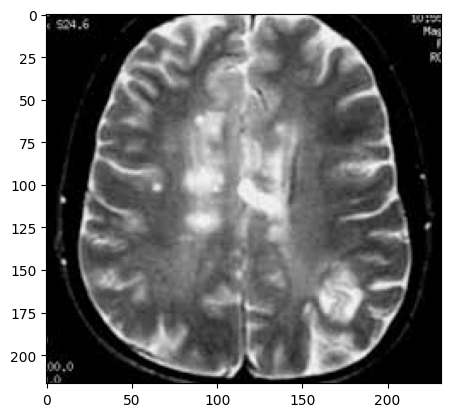

In [18]:
img = Image.open(r"brain_tumor_dataset/no/15 no.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
answ = model.predict_on_batch(x)
classification = np.where(answ == np.amax(answ))[1][0]
imshow(img)
print(str(answ[0][classification]*100) + '% Confidence This Is ' + names(classification))

99.99690055847168% Confidence This Is A Tumor


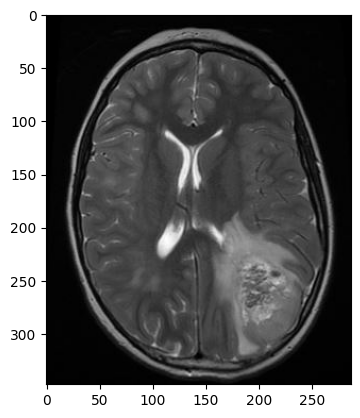

In [19]:
img = Image.open(r"brain_tumor_dataset/yes/Y100.JPG")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
answ = model.predict_on_batch(x)
classification = np.where(answ == np.amax(answ))[1][0]
imshow(img)
print(str(answ[0][classification]*100) + '% Confidence This Is A ' + names(classification))

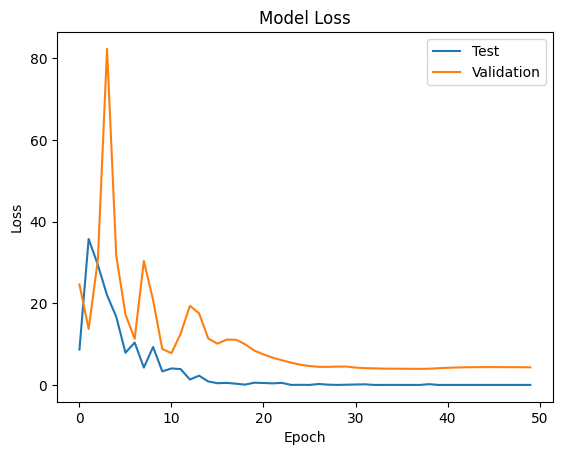

In [20]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()